# Importando libs

In [1]:
import pandas as pd
import xlwt
import seaborn as sns
import random
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc('figure', figsize = (14,6))
from scipy.stats import ranksums

# Funções para tratamento de dados

Função para remoção de ponto e virgula e conversão para float.

In [2]:
def tratamento_virgula_ponto(dataset, coluns):
    for colun in coluns:
        for i in range(dataset.shape[0]):
            dataset.loc[i, colun] = dataset.loc[i, colun].replace('.', '')
            dataset.loc[i, colun] = dataset.loc[i, colun].replace(',', '.')
        dataset = dataset.astype({colun:float})
    return dataset

# importando dados dos livros e tratando

In [3]:
MagaluLivros = pd.read_csv('./livros_magalu.csv', sep=';')
MagaluLivros

,Livro,preco,preco_desconto,parcelas,valor_parcela
0,A garota do lago,"39,90","8,40",1,"8,40"
1,BOX HARRY POTTER EDIÇÃO COMEMORATIVA 20 ANOS ...,"499,90","237,41",12,"20,83"
2,Box Trilogia O Senhor dos Anéis,"199,90","98,00",6,"16,33"
3,As crônicas de Nárnia - volume único,"99,90","29,90",1,"29,90"
4,O pequeno príncipe,"21,90","10,70",1,"10,70"
...,...,...,...,...,...
710,coleção ii,"49,90","32,90",1,"32,90"
711,Inferno (Ilustrado),"69,90","69,90",1,"69,90"
712,Inimigos públicos,"41,08","41,08",1,"41,08"
713,Quadribol através dos séculos,"44,90","40,41",1,"40,41"


In [4]:
MagaluLivros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Livro           715 non-null    object
 1   preco           715 non-null    object
 2   preco_desconto  715 non-null    object
 3   parcelas        715 non-null    int64 
 4   valor_parcela   715 non-null    object
dtypes: int64(1), object(4)
memory usage: 28.1+ KB


**Podemos perceber que os dados estão no tipo object**

In [5]:
MagaluLivros = tratamento_virgula_ponto(MagaluLivros, ['preco', 'preco_desconto', 'valor_parcela'])

In [6]:
MagaluLivros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Livro           715 non-null    object 
 1   preco           715 non-null    float64
 2   preco_desconto  715 non-null    float64
 3   parcelas        715 non-null    int64  
 4   valor_parcela   715 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 28.1+ KB


**Depois de efetuado o tratamento os dados ficaram organizados**

In [7]:
MagaluLivros.describe().round(2)

,preco,preco_desconto,parcelas,valor_parcela
count,715.00,715.00,715.00,715.00
mean,55.11,38.22,1.48,28.67
std,35.81,22.53,1.04,13.50
min,8.90,4.50,1.00,4.50
25%,37.91,26.95,1.00,18.45
50%,49.90,34.90,1.00,26.91
75%,59.90,43.90,2.00,35.90
max,499.90,237.41,12.00,148.79


Assim temos informações como a média dos preços e os quartis, como também o maior preço dos livros 

In [8]:
# Vamos preparar para exibir um grafico de disperção com o sns, mas primeiro temos que prepara uma nova coluna numerada para evitar um bug visual
MagaluLivros['index'] = list(range(MagaluLivros.shape[0]))

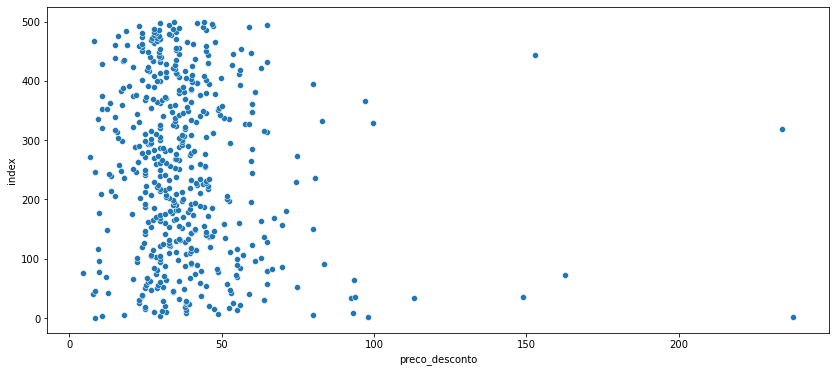

In [9]:
# E agora vamos plotar o grafico com limite dos 500 primeiros produtos da pesquisa
fig_livro = sns.scatterplot(x = 'preco_desconto', y = 'index', data=MagaluLivros[0:501])

array([[<AxesSubplot:title={'center':'preco'}>]], dtype=object)

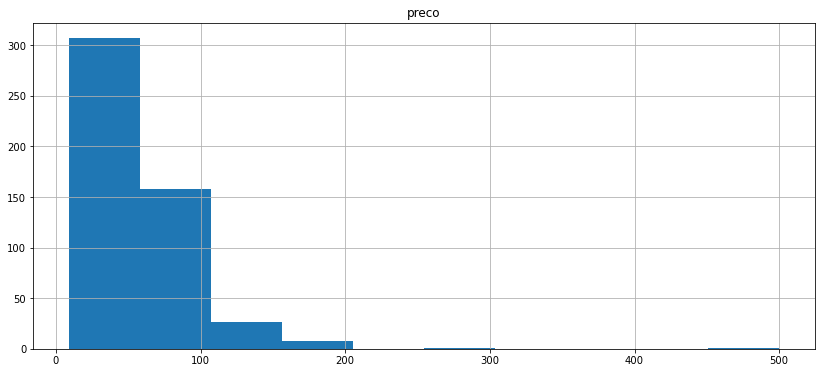

In [10]:
MagaluLivros[0:501].hist(['preco'])

vamos agora fazer a remoção dos outliers para termos um histograma mais visivel

In [11]:
valor = MagaluLivros['preco']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5*iiq
limite_superior = q3 + 1.5*iiq

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
MagaluLivros2 = MagaluLivros[selecao]

array([[<AxesSubplot:title={'center':'preco'}>]], dtype=object)

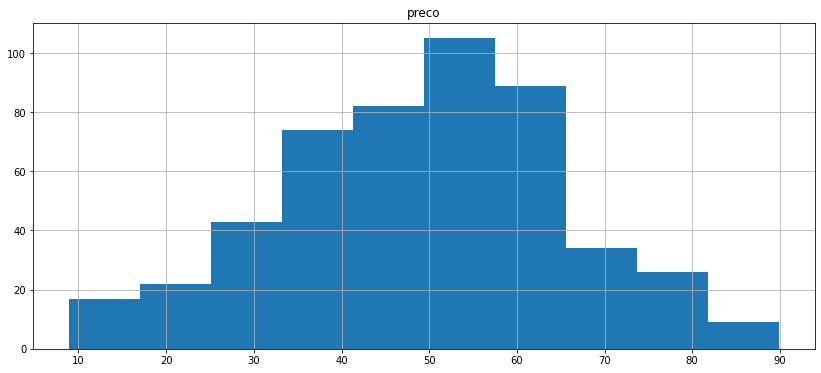

In [12]:
MagaluLivros2[0:501].hist(['preco'])

agora vemos um histograma com uma curva mais visivel.

In [13]:
MagaluLivros2.describe().round(2)

,preco,preco_desconto,parcelas,valor_parcela,index
count,655.00,655.00,655.00,655.00,655.00
mean,47.46,33.98,1.28,28.68,367.48
std,16.39,12.66,0.53,12.39,202.39
min,8.90,4.50,1.00,4.50,0.00
25%,35.24,26.44,1.00,18.95,197.50
50%,47.90,34.12,1.00,27.10,370.00
75%,59.90,40.41,1.00,35.90,541.50
max,89.90,89.90,4.00,89.90,714.00


E mesmo depois da remoção dos outliers vemos que o valor da parcela tem praticamente os mesmos valores

# importando dados das geladeiras e tratando

In [78]:
MagaluGeladeiras = pd.read_csv('./Geladeiras_magalu.csv', sep=';')
MagaluGeladeiras

,Geladeira,preco,preco_desconto,parcelas,valor_parcela
0,Geladeira/Refrigerador Consul Frost Free Duplex,"4.099,00","3.399,00",10,"339,9"
1,Geladeira/Refrigerador Brastemp Frost Free Inv...,"6.300,00","4.399,00",10,"439,9"
2,Geladeira/Refrigerador Brastemp Frost Free Duplex,"4.270,00","3.099,00",10,"309,9"
3,Geladeira/Refrigerador Electrolux Frost Free,"4.340,00","2.499,00",10,"249,9"
4,Geladeira/Refrigerador Frost Free cor Inox 310...,"3.389,00","2.324,07",12,"208,25"
...,...,...,...,...,...
711,GeladeiraRefrigerador Electrolux Frost Free In...,"3.939,90","3.196,05",10,"343,66"
712,Refrigerador/geladeira bre57 akbna 2 pts 443 l...,"4.999,00","4.749,05",10,"499,9"
713,Geladeira Consul 450 Litros Frost Free Duplex ...,"3.699,00","3.699,00",1,"3.699,00"
714,Refrigerador French Door 579l Dm84x Electrolux,"8.190,00","7.780,50",1,"7.780,50"


In [79]:
MagaluGeladeiras = tratamento_virgula_ponto(MagaluGeladeiras, ['preco', 'preco_desconto', 'valor_parcela'])
MagaluGeladeiras

,Geladeira,preco,preco_desconto,parcelas,valor_parcela
0,Geladeira/Refrigerador Consul Frost Free Duplex,4099.0,3399.00,10,339.90
1,Geladeira/Refrigerador Brastemp Frost Free Inv...,6300.0,4399.00,10,439.90
2,Geladeira/Refrigerador Brastemp Frost Free Duplex,4270.0,3099.00,10,309.90
3,Geladeira/Refrigerador Electrolux Frost Free,4340.0,2499.00,10,249.90
4,Geladeira/Refrigerador Frost Free cor Inox 310...,3389.0,2324.07,12,208.25
...,...,...,...,...,...
711,GeladeiraRefrigerador Electrolux Frost Free In...,3939.9,3196.05,10,343.66
712,Refrigerador/geladeira bre57 akbna 2 pts 443 l...,4999.0,4749.05,10,499.90
713,Geladeira Consul 450 Litros Frost Free Duplex ...,3699.0,3699.00,1,3699.00
714,Refrigerador French Door 579l Dm84x Electrolux,8190.0,7780.50,1,7780.50


Com uma rápida olhada podemos observar que com o scraping veio alguns produtos fora da pesquisa.

In [80]:
# com essa lista de codigos podemos fazer uma lista de itens que são só os produtos da pesquisa
lista = []
for i in MagaluGeladeiras['Geladeira'].unique():
    if i.split()[0] != 'Geladeira/Refrigerador' and i.split()[0] != 'Refrigerador' and i.split()[0] != 'Refrigerador/geladeira' and i.split()[0] != 'GeladeiraRefrigerador' and i.split()[0] != 'Refrigerador/Geladeira' and i.split()[0] != 'Geladeira':
        print(i)
    else:
        lista.append(i)

Bandeja de Gelo Ice Twister A96999301 Refrigerador Electrolux DM84X, DB84X, DB84S
Gaveta freezer refrigerador panasonic nr-bb53
Mini Geladeira 4L 12V 127V Capacidade 6 Latas de 350ML Com Cabo DC Sem Cabo AC Branca Multilaser - TV009
Mini Geladeira 15 Litros branca Mini Cool
Mini Geladeira 18 litros preta Mini Cool
Kit Geladeira Evolution RT38 Inverter Duplex 385L Bivolt E Lava & Seca Ecobubble 11.7kg 110V
Gaveta de Legumes Refrigerador Electrolux R26/280/RE29
Mini Geladeira Portátil Branca KX3 4,5 Litros Refrigera e Aquece Universal
Conservador/Refrigerador Gelopar GHDE-220H
Mini Geladeira Multilaser 4L 12V 110V Capacidade 6 Latas 350ML Com Cabo DC Sem Cabo AC Branca Tv009
Tampa Da Gaveta De Resfriamento Rápido Rfn711604
Jogo Borracha Geladeira Continental Porta e Freezer Rfct460
Mini Geladeira Multilaser Retro Trivolt 4L 12V127V220V Vermelha Tv007
Gaveta freezer refrigerador panasonic nr-bb52
Gaveta freezer refrigerador panasonic nr-bb51
Refrigerador/Expositor Vertical Gelopar GPTU-40

In [81]:
selecao = MagaluGeladeiras['Geladeira'].isin(lista)
MagaluGeladeiras2 = MagaluGeladeiras[selecao]
MagaluGeladeiras2

,Geladeira,preco,preco_desconto,parcelas,valor_parcela
0,Geladeira/Refrigerador Consul Frost Free Duplex,4099.0,3399.00,10,339.90
1,Geladeira/Refrigerador Brastemp Frost Free Inv...,6300.0,4399.00,10,439.90
2,Geladeira/Refrigerador Brastemp Frost Free Duplex,4270.0,3099.00,10,309.90
3,Geladeira/Refrigerador Electrolux Frost Free,4340.0,2499.00,10,249.90
4,Geladeira/Refrigerador Frost Free cor Inox 310...,3389.0,2324.07,12,208.25
...,...,...,...,...,...
711,GeladeiraRefrigerador Electrolux Frost Free In...,3939.9,3196.05,10,343.66
712,Refrigerador/geladeira bre57 akbna 2 pts 443 l...,4999.0,4749.05,10,499.90
713,Geladeira Consul 450 Litros Frost Free Duplex ...,3699.0,3699.00,1,3699.00
714,Refrigerador French Door 579l Dm84x Electrolux,8190.0,7780.50,1,7780.50


In [82]:
falta = len(MagaluGeladeiras2[MagaluGeladeiras2['preco'] == 0])

In [83]:
print(f'Temos então {falta} produtos em falta.')

Temos então 5 produtos em falta.


In [84]:
# concertando o index e removendo os valores nulos
MagaluGeladeiras2 = MagaluGeladeiras2[MagaluGeladeiras2['preco'] != 0]
MagaluGeladeiras2.index = list(range(MagaluGeladeiras2.shape[0]))
MagaluGeladeiras2

,Geladeira,preco,preco_desconto,parcelas,valor_parcela
0,Geladeira/Refrigerador Consul Frost Free Duplex,4099.0,3399.00,10,339.90
1,Geladeira/Refrigerador Brastemp Frost Free Inv...,6300.0,4399.00,10,439.90
2,Geladeira/Refrigerador Brastemp Frost Free Duplex,4270.0,3099.00,10,309.90
3,Geladeira/Refrigerador Electrolux Frost Free,4340.0,2499.00,10,249.90
4,Geladeira/Refrigerador Frost Free cor Inox 310...,3389.0,2324.07,12,208.25
...,...,...,...,...,...
672,Geladeira/Refrigerador Consul Frost Free 342L ...,2499.9,2374.91,12,208.33
673,GeladeiraRefrigerador Electrolux Frost Free In...,3939.9,3196.05,10,343.66
674,Refrigerador/geladeira bre57 akbna 2 pts 443 l...,4999.0,4749.05,10,499.90
675,Geladeira Consul 450 Litros Frost Free Duplex ...,3699.0,3699.00,1,3699.00


In [87]:
MagaluGeladeiras2.describe().round(2)

,preco,preco_desconto,parcelas,valor_parcela
count,677.00,677.00,677.00,677.00
mean,4668.88,3868.63,9.45,1045.62
std,3307.67,2592.16,4.03,1807.52
min,1621.11,1413.80,1.00,135.09
25%,2989.00,2564.05,10.00,260.75
50%,3939.90,3257.20,12.00,352.13
75%,5042.00,4229.91,12.00,583.33
max,29399.00,25269.05,12.00,19810.82


Logo vemos que nessa amostra de 684 items achados na pesquisas já começou a exibir produtos sem preços

C:\Users\RAILSO~1\AppData\Local\Temp/ipykernel_2736/3413472471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MagaluGeladeiras2['index'] = list(range(MagaluGeladeiras2.shape[0]))


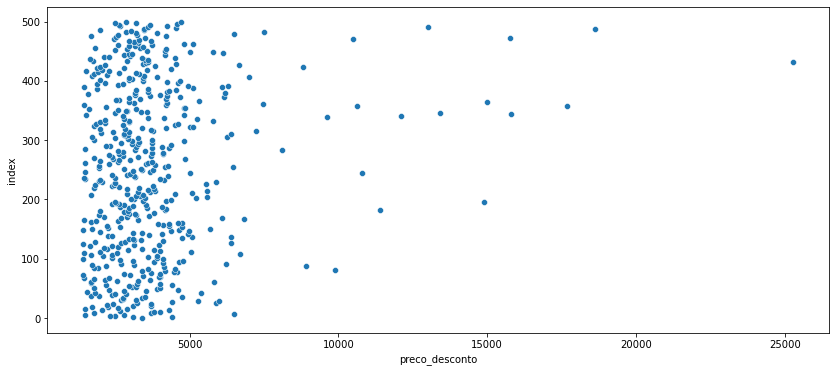

In [88]:
MagaluGeladeiras2['index'] = list(range(MagaluGeladeiras2.shape[0]))
fig_livro = sns.scatterplot(x = 'preco_desconto', y = 'index', data=MagaluGeladeiras2[0:501])

array([[<AxesSubplot:title={'center':'preco_desconto'}>]], dtype=object)

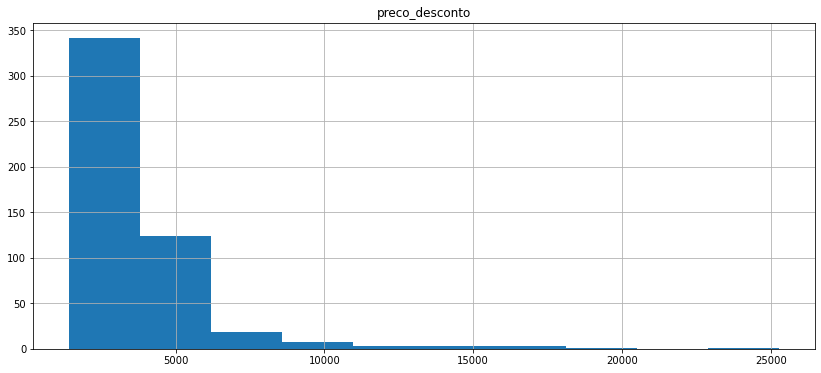

In [91]:
MagaluGeladeiras2[0:501].hist(['preco_desconto'])

In [92]:
valor = MagaluGeladeiras2['preco']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5*iiq
limite_superior = q3 + 1.5*iiq

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
MagaluGeladeiras3 = MagaluGeladeiras2[selecao]

array([[<AxesSubplot:title={'center':'preco_desconto'}>]], dtype=object)

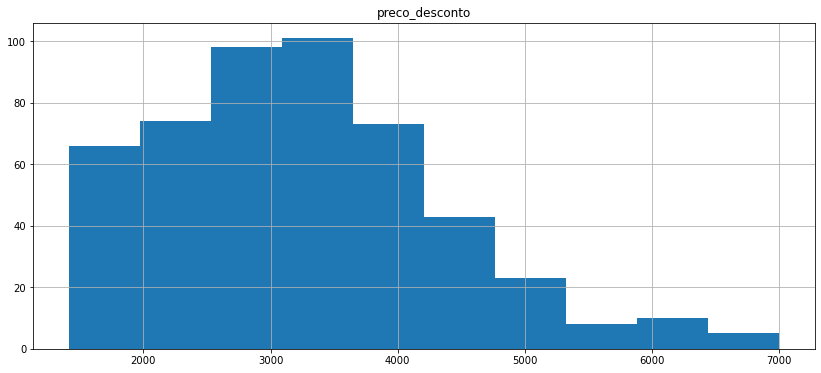

In [93]:
MagaluGeladeiras3[0:501].hist(['preco_desconto'])

In [94]:
MagaluGeladeiras3.describe()

,preco,preco_desconto,parcelas,valor_parcela,index
count,626.000000,626.000000,626.000000,626.000000,626.000000
mean,3941.036086,3312.250655,9.439297,939.234265,332.285942
std,1412.930914,1165.691589,4.086699,1466.280689,195.276197
min,1621.110000,1413.800000,1.000000,135.090000,0.000000
25%,2869.557500,2499.000000,10.000000,254.125000,162.250000
50%,3776.530000,3175.215000,12.000000,333.330000,326.500000
75%,4799.000000,3988.775000,12.000000,474.990000,499.750000
max,8050.000000,7739.000000,12.000000,7739.000000,675.000000


# importando dados dos notebooks e tratando

In [95]:
MagaluNotebooks = pd.read_csv('./Notebooks_magalu.csv', sep=';')
MagaluNotebooks

,Notebook,preco,preco_desconto,parcelas,valor_parcela
0,Notebook Gamer Acer Nitro 5 AN515-54-58CL Intel,"6.499,00","5.399,10",12,"499,92"
1,Notebook Gamer Acer Nitro 5 AN515-54-574Q Inte...,"6.999,00","5.224,05",12,"458,25"
2,Notebook 2AM E550 CI716256GBW10 Intel Core i7 ...,"9.999,00","5.849,10",12,"541,58"
3,Notebook Gamer Acer Nitro 5 AN515-43-R59W AMD R5,"6.499,00","5.399,10",12,"499,92"
4,Notebook Gamer Predator Helios 300 PH315-53-75...,"8.999,00","8.549,05",12,"749,92"
...,...,...,...,...,...
355,Asus GX701GW (Laptop Gamer) i7-9750H tela 17' ...,0,0,0,0
356,MSI Stealth 15M (Laptop Gamer) Intel 11ª gera...,0,0,0,0
357,"Notebook 15,6pol Dell Gaming G3 3590-U20P (Cor...",0,0,0,0
358,PC Gamer Intel 9ª Geração i7 9700K 4.9Ghz 8 Nú...,0,0,0,0


In [96]:
MagaluNotebooks = tratamento_virgula_ponto(MagaluNotebooks, ['preco', 'preco_desconto', 'valor_parcela'])

In [97]:
MagaluNotebooks

,Notebook,preco,preco_desconto,parcelas,valor_parcela
0,Notebook Gamer Acer Nitro 5 AN515-54-58CL Intel,6499.0,5399.10,12,499.92
1,Notebook Gamer Acer Nitro 5 AN515-54-574Q Inte...,6999.0,5224.05,12,458.25
2,Notebook 2AM E550 CI716256GBW10 Intel Core i7 ...,9999.0,5849.10,12,541.58
3,Notebook Gamer Acer Nitro 5 AN515-43-R59W AMD R5,6499.0,5399.10,12,499.92
4,Notebook Gamer Predator Helios 300 PH315-53-75...,8999.0,8549.05,12,749.92
...,...,...,...,...,...
355,Asus GX701GW (Laptop Gamer) i7-9750H tela 17' ...,0.0,0.00,0,0.00
356,MSI Stealth 15M (Laptop Gamer) Intel 11ª gera...,0.0,0.00,0,0.00
357,"Notebook 15,6pol Dell Gaming G3 3590-U20P (Cor...",0.0,0.00,0,0.00
358,PC Gamer Intel 9ª Geração i7 9700K 4.9Ghz 8 Nú...,0.0,0.00,0,0.00


In [98]:
MagaluNotebooks[MagaluNotebooks['preco']==0]

,Notebook,preco,preco_desconto,parcelas,valor_parcela
119,Notebook Gamer Acer Nitro 5 i5 8GB 1TB+128GB S...,0.0,0.0,0,0.0
152,Notebook Dell Gamer G3 - Tela 15.6 Full HD- i7...,0.0,0.0,0,0.0
153,Notebook Gamer 2AM E550 Intel Core i5 8GB 256GB,0.0,0.0,0,0.0
154,Notebook Gamer Acer Aspire Nitro 5 AN515-44-R8HN,0.0,0.0,0,0.0
155,Notebook ideapad Gaming 3i i7-10750H 16GB 512G...,0.0,0.0,0,0.0
...,...,...,...,...,...
355,Asus GX701GW (Laptop Gamer) i7-9750H tela 17' ...,0.0,0.0,0,0.0
356,MSI Stealth 15M (Laptop Gamer) Intel 11ª gera...,0.0,0.0,0,0.0
357,"Notebook 15,6pol Dell Gaming G3 3590-U20P (Cor...",0.0,0.0,0,0.0
358,PC Gamer Intel 9ª Geração i7 9700K 4.9Ghz 8 Nú...,0.0,0.0,0,0.0


In [99]:
MagaluNotebooks = MagaluNotebooks[MagaluNotebooks['preco']!=0]

In [107]:
# com essa lista de codigos podemos fazer uma lista de itens que são só os produtos da pesquisa
lista = []
for i in MagaluNotebooks['Notebook'].unique():
    if i.split()[0] != 'Notebook' and i.split()[-2] != 'RAM' and i.split()[0:2] != ['Kit','Notebook'] and i.split()[-2] != 'SSD':
        print(i)
    else:
        lista.append(i)  

Palmrest Base Apoio Dell Inspiron G7 7577 7588 0c5cv0 - Azul
Cabo Flat Notebook - Hp 240 G3
Mobile HP ZBook 15u G5 i7-8650U 16GB 512GB Win10Pro
Bateria Para Hp 240 G1 240 G2 240 G3 Oa04 OA03 OA04 L18650-oa04
Moldura Bezel Para Dell Alienware 15 R3 15 R4 0r8c3m R8c3m
Acer Aspire 5 528V Intel I5-8GB RAM1TBHD128GBSSD15.6GeForce GTX 1650 Windows 10 Preto / Vermelho
Kit Notebbok Gamer Aspire Nitro 5 AN515-54-58CL + Mochila Gamer Nitro


In [108]:
selecao = MagaluNotebooks['Notebook'].isin(lista)
MagaluNotebooks2 = MagaluNotebooks[selecao]
MagaluNotebooks2

,Notebook,preco,preco_desconto,parcelas,valor_parcela
0,Notebook Gamer Acer Nitro 5 AN515-54-58CL Intel,6499.00,5399.10,12,499.92
1,Notebook Gamer Acer Nitro 5 AN515-54-574Q Inte...,6999.00,5224.05,12,458.25
2,Notebook 2AM E550 CI716256GBW10 Intel Core i7 ...,9999.00,5849.10,12,541.58
3,Notebook Gamer Acer Nitro 5 AN515-43-R59W AMD R5,6499.00,5399.10,12,499.92
4,Notebook Gamer Predator Helios 300 PH315-53-75...,8999.00,8549.05,12,749.92
...,...,...,...,...,...
147,Asus Zephyrus G14 (Laptop Gamer) RTX 3060 Ryze...,24200.00,22990.00,12,2016.67
148,Notebook Gamer 2AM 9ºG Intel Core i7-9700 8GB ...,7199.00,7199.00,1,7199.00
149,MSI GL66 (Laptop Gamer) i7-11800H tela 15' FHD...,26800.00,25460.00,12,2233.33
150,Notebook Dell Gaming G3-3500-M40P 15.6 10ª Ger...,10979.99,10430.99,12,915.00


**A maioria dos notenooks estão fora de estoque**

In [109]:
MagaluNotebooks2.describe()

,preco,preco_desconto,parcelas,valor_parcela
count,145.000000,145.000000,145.000000,145.000000
mean,15349.131931,14389.256621,9.462069,2708.393655
std,12825.783329,12297.454554,4.387515,2896.039815
min,5157.790000,4949.100000,1.000000,458.250000
25%,7222.110000,6638.090000,10.000000,724.920000
50%,9699.890000,9024.990000,12.000000,1166.580000
75%,18500.000000,17575.000000,12.000000,3675.000000
max,71600.000000,68020.000000,12.000000,15488.420000


**Mais da metade dos pesquisados estão fora de estoque**

In [113]:
MagaluNotebooks2[MagaluNotebooks2['preco'] == 71600]

,Notebook,preco,preco_desconto,parcelas,valor_parcela
32,Gigabyte Aero 15 (Laptop Gamer) i9-11980HK tel...,71600.0,68020.0,12,5966.67


In [114]:
nome = MagaluNotebooks2['Notebook'][32]
preco = MagaluNotebooks2['preco'][32]
print(f'O notebook mais caro da pesquisa é {nome}, na bagatela de {preco}')

O notebook mais caro da pesquisa é Gigabyte Aero 15 (Laptop Gamer) i9-11980HK tela 15' UHD 4K Nvidia RTX 3080 SSD 8Tb NVMe RAM 64Gb, na bagatela de 71600.0


C:\Users\RAILSO~1\AppData\Local\Temp/ipykernel_2736/3365015994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MagaluNotebooks2['index'] = list(range(MagaluNotebooks2.shape[0]))


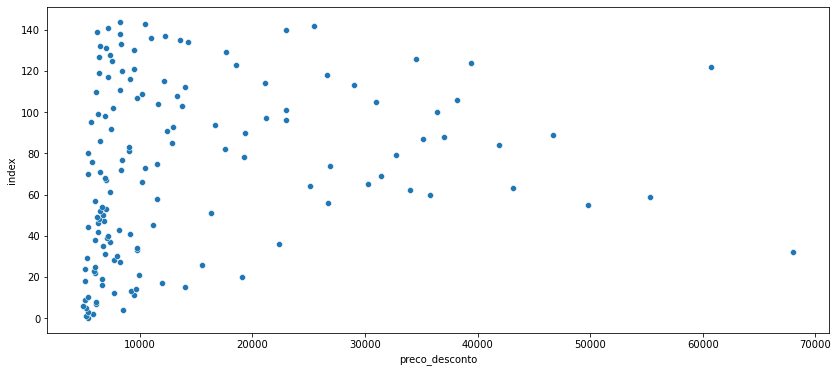

In [115]:
MagaluNotebooks2['index'] = list(range(MagaluNotebooks2.shape[0]))
fig_notebook = sns.scatterplot(x = 'preco_desconto', y = 'index', data=MagaluNotebooks2)

array([[<AxesSubplot:title={'center':'preco_desconto'}>]], dtype=object)

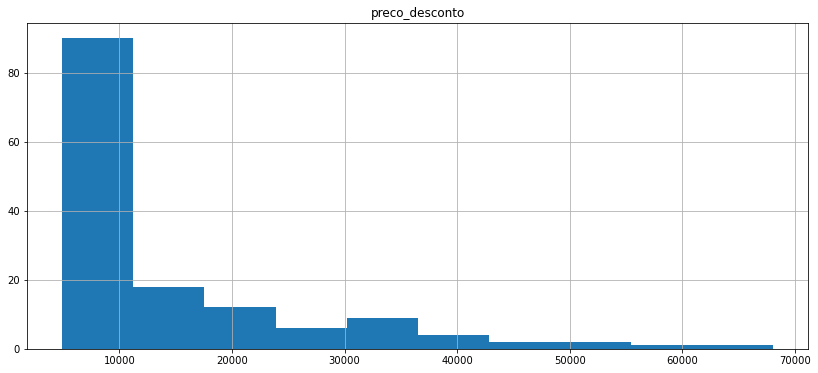

In [116]:
MagaluNotebooks2.hist(['preco_desconto'])

In [117]:
valor = MagaluNotebooks2['preco']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5*iiq
limite_superior = q3 + 1.5*iiq

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
MagaluNotebooks2 = MagaluNotebooks2[selecao]

array([[<AxesSubplot:title={'center':'preco_desconto'}>]], dtype=object)

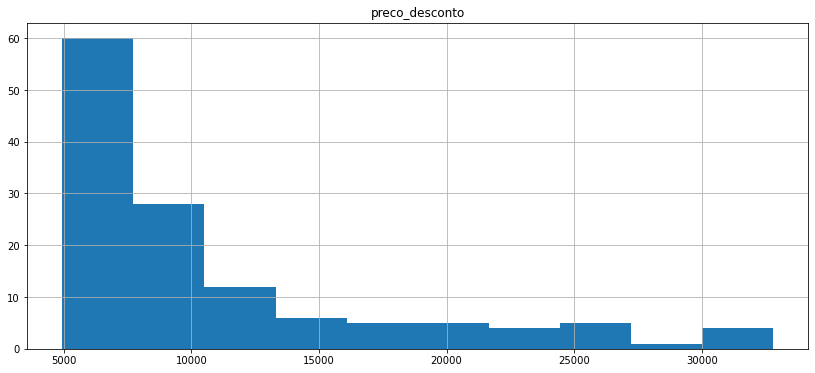

In [118]:
MagaluNotebooks2.hist(['preco_desconto'])

**Mesmo com a remoção dos outliers vimos que o histograma ainda fica dificil a visualização da cruva**

In [119]:
MagaluNotebooks2.describe()

,preco,preco_desconto,parcelas,valor_parcela,index
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,11807.469615,11002.475231,9.169231,2578.174308,70.638462
std,6953.101655,6727.463612,4.544591,3017.646215,43.172810
min,5157.790000,4949.100000,1.000000,458.250000,0.000000
25%,7122.977500,6476.312500,10.000000,704.762500,33.250000
50%,9499.495000,8271.575000,12.000000,1036.620000,70.500000
75%,13439.742500,12734.740000,12.000000,2702.085000,108.750000
max,34500.000000,32775.000000,12.000000,15488.420000,144.000000
